[View in Colaboratory](https://colab.research.google.com/github/thayssa1186/PassagersKeras/blob/master/LSTMPassagerKeras.ipynb)

In [0]:
import numpy
import math
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [40]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1B7HOlj3MNbO7fBVBJP2ohOo5cbXHlFX5'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('international-airline-passengers.csv') 
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content ""Month","International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"
"1949-01",112
"1949-02",118
"1949-03",132
"1949-04",129
"1949-05",121
"1949-06",135
"1949-07",148
"1949-08",148
"1949-09",136
"1949-10",119
"1949-11",104
"1949-12",118
"1950-01",115
"1950-02",126
"1950-03",141
"1950-04",135
"1950-05",125
"1950-06",149
"1950-07",170
"1950-08",170
"1950-09",158
"1950-10",133
"1950-11",114
"1950-12",140
"1951-01",145
"1951-02",150
"1951-03",178
"1951-04",163
"1951-05",172
"1951-06",178
"1951-07",199
"1951-08",199
"1951-09",184
"1951-10",162
"1951-11",146
"1951-12",166
"1952-01",171
"1952-02",180
"1952-03",193
"1952-04",181
"1952-05",183
"1952-06",218
"1952-07",230
"1952-08",242
"1952-09",209
"1952-10",191
"1952-11",172
"1952-12",194
"1953-01",196
"1953-02",196
"1953-03",236
"1953-04",235
"1953-05",229
"1953-06",243
"1953-07",264
"1953-08",272
"1953-09",237
"1953-10",211
"1953-11",180
"1953-12",201
"1954-01",204
"1954-02",188
"1954-03",235
"1954-04"

In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
numpy.random.seed(7)

In [0]:
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [0]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [0]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [48]:
model = Sequential()
model.add(LSTM(100, input_dim = look_back))
model.add(Dense(1))
model.add(Activation("linear"))

model.compile(loss='mse', optimizer='rmsprop')
model.fit(trainX, trainY, epochs=100, batch_size=32,  validation_data=(testX, testY), verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, input_shape=(None, 1))`
  


Train on 94 samples, validate on 46 samples
Epoch 1/100
94/94 [==============================] - 1s 11ms/step - loss: 0.0597 - val_loss: 0.3380
Epoch 2/100
94/94 [==============================] - 0s 281us/step - loss: 0.0479 - val_loss: 0.3040
Epoch 3/100
94/94 [==============================] - 0s 233us/step - loss: 0.0404 - val_loss: 0.2768
Epoch 4/100
94/94 [==============================] - 0s 265us/step - loss: 0.0346 - val_loss: 0.2535
Epoch 5/100
94/94 [==============================] - 0s 268us/step - loss: 0.0298 - val_loss: 0.2321
Epoch 6/100
94/94 [==============================] - 0s 257us/step - loss: 0.0259 - val_loss: 0.2126
Epoch 7/100
94/94 [==============================] - 0s 250us/step - loss: 0.0226 - val_loss: 0.1950
Epoch 8/100
94/94 [==============================] - 0s 255us/step - loss: 0.0199 - val_loss: 0.1787
Epoch 9/100
94/94 [==============================] - 0s 247us/step - loss: 0.0177 - val_loss: 0.1641
Epoch 10/100
94/94 [============================

In [0]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [0]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [51]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.84 RMSE
Test Score: 49.14 RMSE


In [0]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [0]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

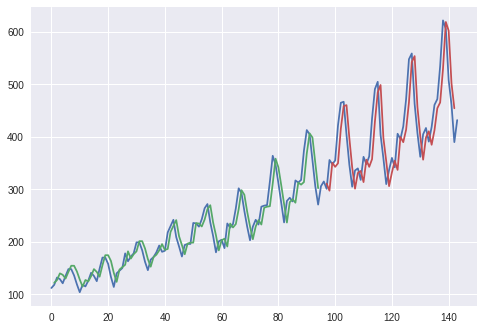

In [54]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()